In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

### Teste

In [7]:
path = 'data/INFLUD21.csv'

df = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)
df

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,06/01/2021,1,06/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE NORDESTE,1382.0,ALAGOINHAS,290070,HOSPITAL REGIONAL DANTAS BIAO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/01/2021,1,03/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE SUL,1385.0,ITABUNA,291480,HOSPITAL CALIXTO MIDLEJ FILHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/01/2021,1,07/01/2021,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,COMPLEXO HOSPITALAR DO TRABALHADOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/01/2021,1,05/01/2021,1,PR,17RS LONDRINA,1371.0,LONDRINA,411370,HCL HOSPITAL DO CANCER DE LONDRINA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/01/2021,2,04/01/2021,1,RS,007 CRS,1596.0,DOM PEDRITO,430660,HOSPITAL SAO LUIZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731285,22/12/2021,51,18/12/2021,50,RJ,NaN,NaN,MACAE,330240,PRONTO SOCORRO MUNICIPAL,...,NaN,NaN,87 - COVID-19 PFIZER - COMIRNATY,NaN,NaN,NaN,87 - COVID-19 PFIZER - COMIRNATY,FD7222,NaN,2.0
1731286,17/03/2021,11,06/03/2021,9,MS,NRS DE TRES LAGOAS,6255.0,SANTA RITA DO PARDO,500755,UNIDADE MISTA DE SAUDE NOSSA S PERPETUO SOCORRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1731287,05/05/2021,18,01/05/2021,17,RJ,NaN,NaN,DUQUE DE CAXIAS,330170,UPA SARAPUI,...,18/09/2021,NaN,88 - COVID-19 JANSSEN - AD26.COV2.S,87 - COVID-19 PFIZER - COMIRNATY,NaN,NaN,88 - COVID-19 JANSSEN - AD26.COV2.S,211A21A,FF8840,2.0
1731288,26/04/2022,17,25/10/2021,43,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,UNIDADE DE PRONTO ATENDIMENTO DR SERGIO AROUCA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [25]:
## agrupando
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], format="%d/%m/%Y" )
time_series = df.groupby(df['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
time_series.columns = ['Date', 'Number']
time_series = time_series.sort_values('Date')
time_series

,Date,Number
0,2021-01-03,187
1,2021-01-04,554
2,2021-01-05,939
3,2021-01-06,1335
4,2021-01-07,1814
...,...,...
723,2023-04-13,7
724,2023-04-14,1
725,2023-04-17,1
726,2023-04-24,3


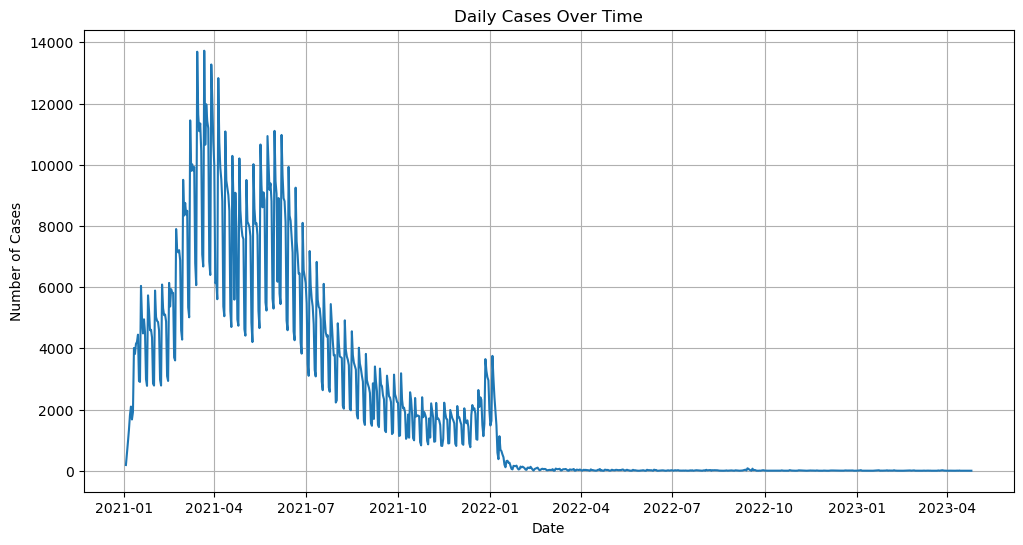

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Number",
             data=time_series)
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

## Plotando gráfico para todos os anos

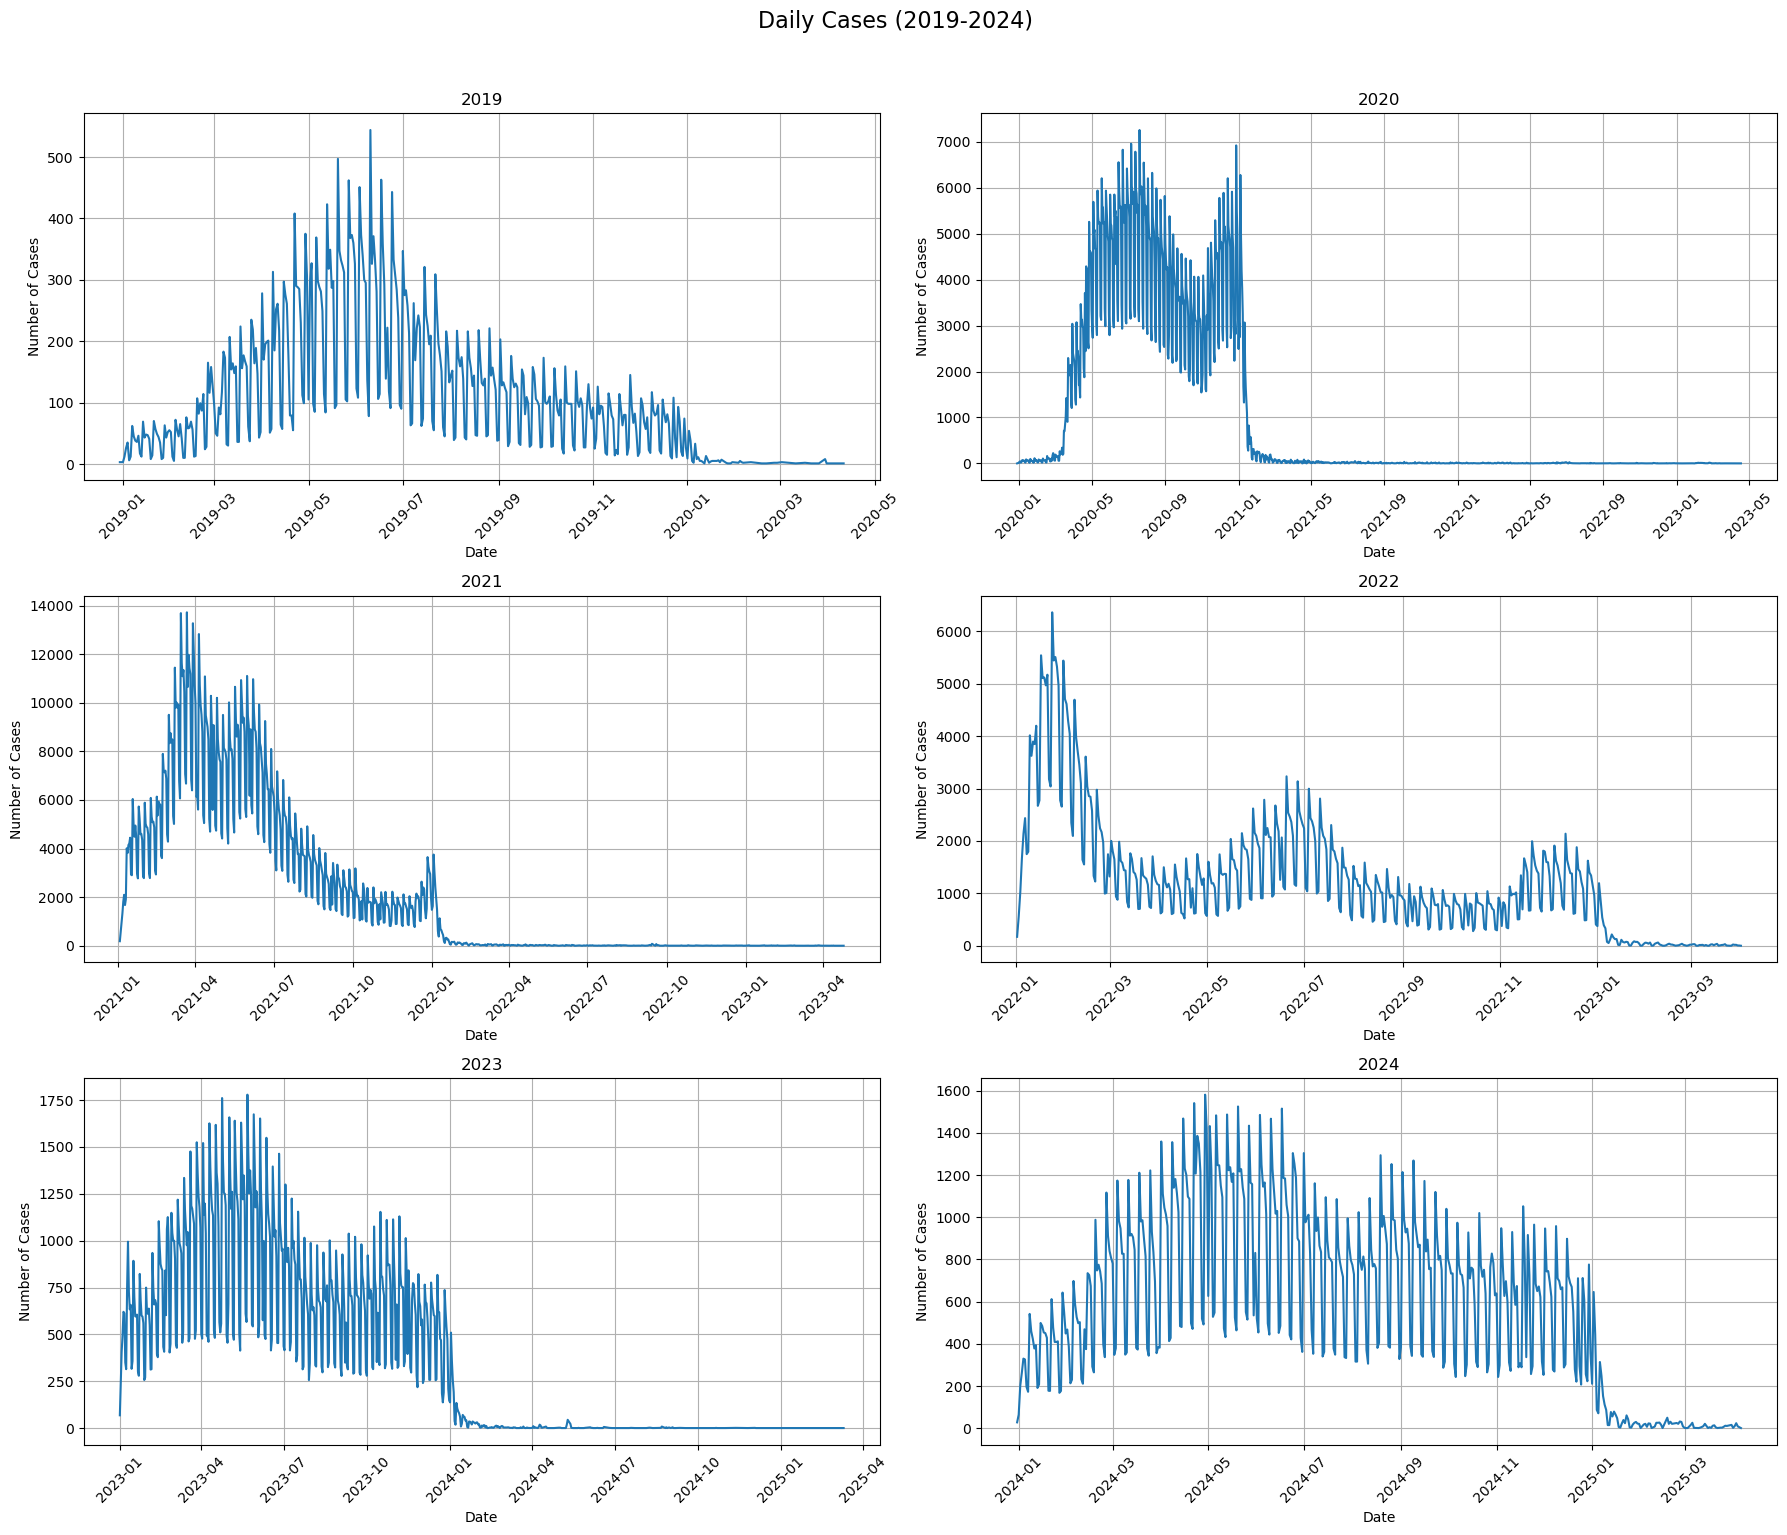

In [59]:
def Extrair_TS(path):
    df = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)
    df

    ## agrupando
    df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], format="%d/%m/%Y" )

    # Filter records for the target year (EX: INFLUD20.csv -> 2020)
    start_date = pd.to_datetime(f"01/01/20{year}", format="%d/%m/%Y")
    end_date = pd.to_datetime(f"31/12/20{year}", format="%d/%m/%Y")
    df = df[(df['DT_NOTIFIC'] >= start_date) & (df['DT_NOTIFIC'] <= end_date)]
    
    time_series = df.groupby(df['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
    time_series.columns = ['Date', 'Number']
    time_series = time_series.sort_values('Date')
    return time_series

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Daily Cases (2019-2024)', fontsize=16, y=1.02)

# Loop through years 2019-2024 (files INFLUD19.csv to INFLUD24.csv)
for i, year in enumerate(range(19, 25)):
    path = f'data/INFLUD{year}.csv'
    ts = Extrair_TS(path)
    
    # Determine subplot position
    row = i // 2
    col = i % 2
    
    # Plot on the corresponding subplot
    ax = axes[row, col]
    sns.lineplot(x="Date", y="Number", data=ts, ax=ax)
    ax.set_title(f'20{year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Cases')
    ax.grid(True)
    
    # Rotate x-axis labels for readability
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()

### metodo de filtragem e recorte por ano
    start_date = pd.to_datetime(f"01/01/20{year}", format="%d/%m/%Y")
    end_date = pd.to_datetime(f"31/12/20{year}", format="%d/%m/%Y")
    df = df[(df['DT_NOTIFIC'] >= start_date) & (df['DT_NOTIFIC'] <= end_date)]
 

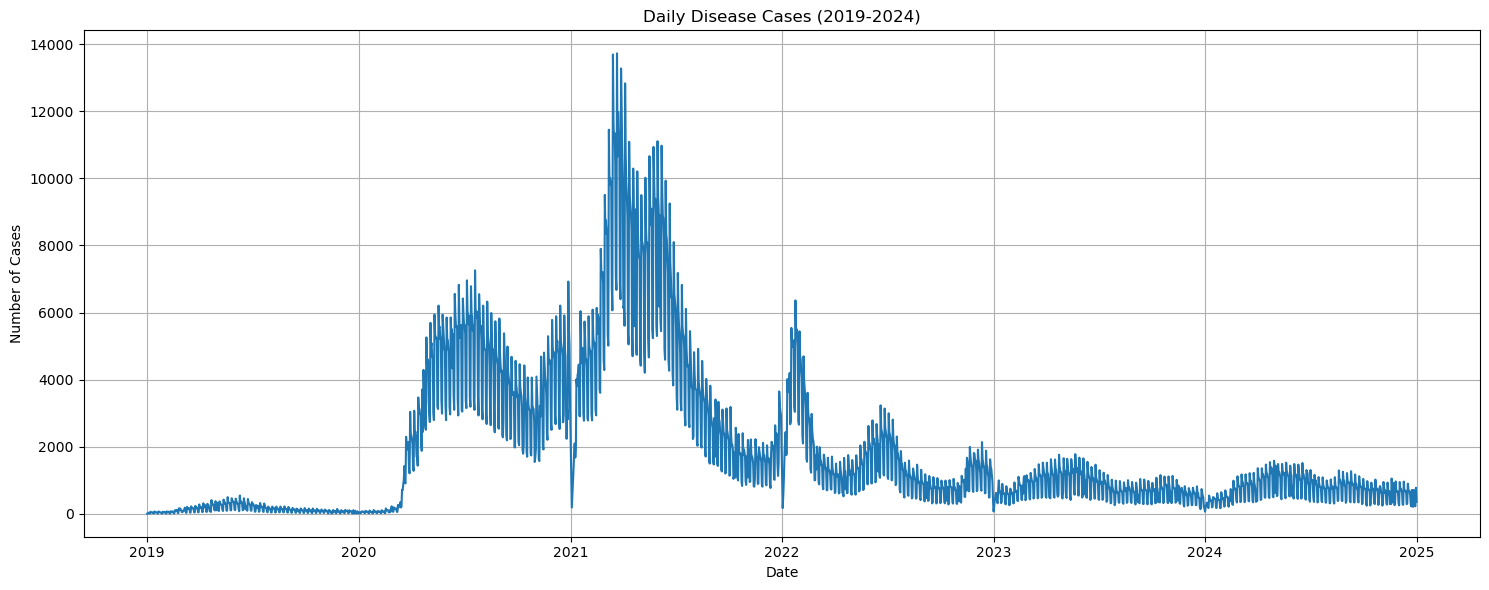

In [8]:
def load_and_filter_data(path, year):
    """Loads a dataset and filters records for the specified year."""
    df = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)
    df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], format="%d/%m/%Y")
    
    # Filter records for the target year (e.g., INFLUD20.csv -> 2020)
    start_date = pd.to_datetime(f"01/01/20{year}", format="%d/%m/%Y")
    end_date = pd.to_datetime(f"31/12/20{year}", format="%d/%m/%Y")
    df = df[(df['DT_NOTIFIC'] >= start_date) & (df['DT_NOTIFIC'] <= end_date)]
    
    return df

# Initialize an empty DataFrame to store all records
all_years = pd.DataFrame()

# Loop through years 2019-2024 (files INFLUD19.csv to INFLUD24.csv)
for year in range(19, 25):
    path = f'data/INFLUD{year}.csv'
    try:
        df_year = load_and_filter_data(path, year)
        all_years = pd.concat([all_years, df_year], ignore_index=True)
    except FileNotFoundError:
        print(f"Warning: File {path} not found. Skipping.")
        continue

# Aggregate daily cases across all years
time_series = all_years.groupby(all_years['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
time_series.columns = ['Date', 'Number']
time_series['Date'] = pd.to_datetime(time_series['Date'])
time_series = time_series.sort_values('Date')

# Plot the combined time series
plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Number", data=time_series)
plt.title('Daily Disease Cases (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

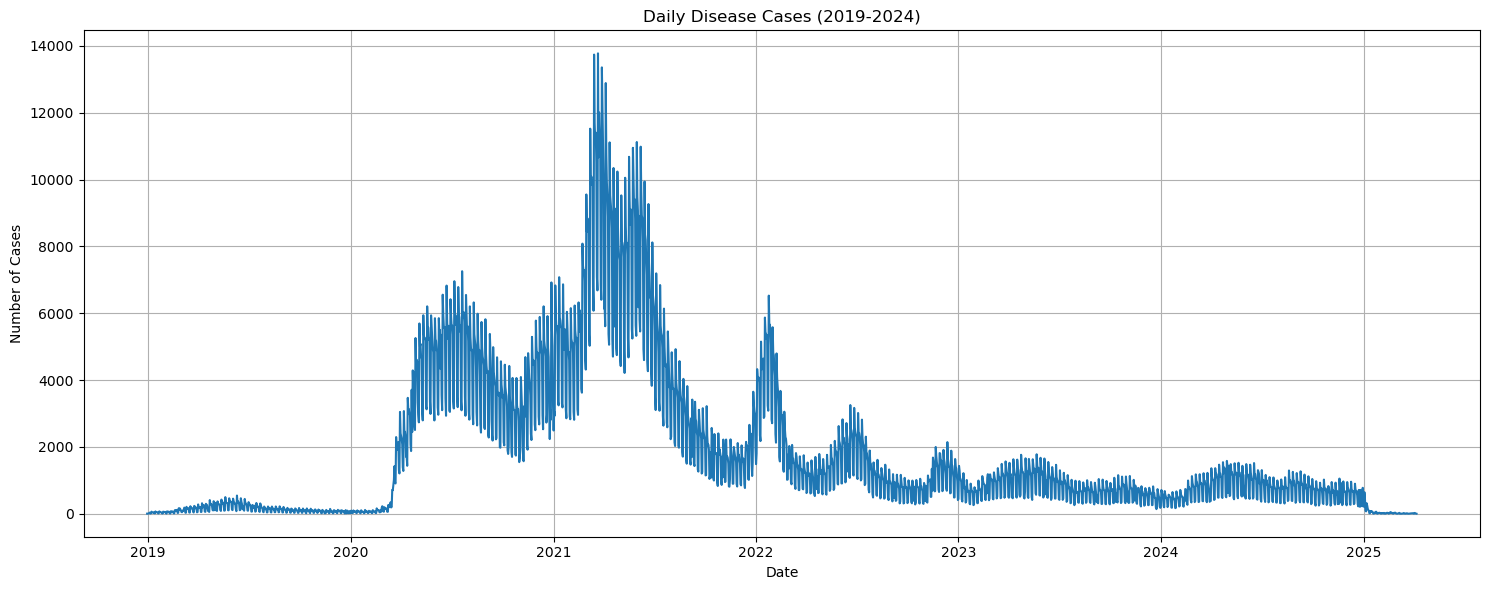

In [20]:
def load_and_filter_data(path, year):
    """Loads a dataset and filters records for the specified year."""
    df = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)
    df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], format="%d/%m/%Y")    
    return df

# Initialize an empty DataFrame to store all records
all_years = pd.DataFrame()

# Loop through years 2019-2024 (files INFLUD19.csv to INFLUD24.csv)
for year in range(19, 25):
    path = f'data/INFLUD{year}.csv'
    try:
        df_year = load_and_filter_data(path, year)
        all_years = pd.concat([all_years, df_year], ignore_index=True)
    except FileNotFoundError:
        print(f"Warning: File {path} not found. Skipping.")
        continue

# Aggregate daily cases across all years
time_series = all_years.groupby(all_years['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
time_series.columns = ['Date', 'Number']
time_series['Date'] = pd.to_datetime(time_series['Date'])
time_series = time_series.sort_values('Date')

# Plot the combined time series
plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Number", data=time_series)
plt.title('Daily Disease Cases (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
#salvando
time_series.to_csv('SRAG_time_series/SRAG_TS.csv', index=False)
print("CSV file saved successfully!")

CSV file saved successfully!
